In [1]:
from neural.containers import Sequential
from neural.losses import MSE, CE
from neural.layers import Dense, TanH, RELU, Softmax
from neural.utils.preprocessing import OneHotEncoder
import datasets.spiral_data as sd 
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 

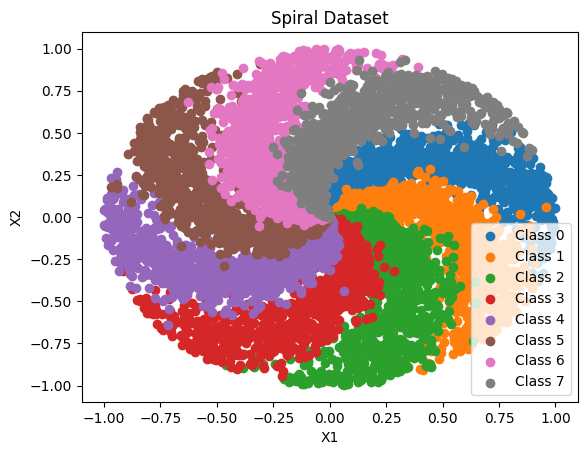

In [57]:
num_classes = 8
(x, y) = sd.generate_spiral_data(n_samples=1000, n_class=num_classes, noise=.2)
sd.plot_spiral(x,y,num_classes)

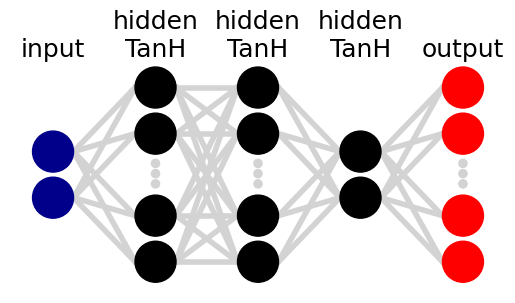

In [58]:
model = Sequential([
    Dense(2, 8),
    TanH(),
    Dense(8, 8),
    TanH(),
    Dense(8, 2),
    TanH(),
    Dense(2, num_classes),
])

model.display_network()

In [62]:
# encode the y's
encoder = OneHotEncoder()
encoder.fit(y)
y_encoded = encoder.encode(y)
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=.2)

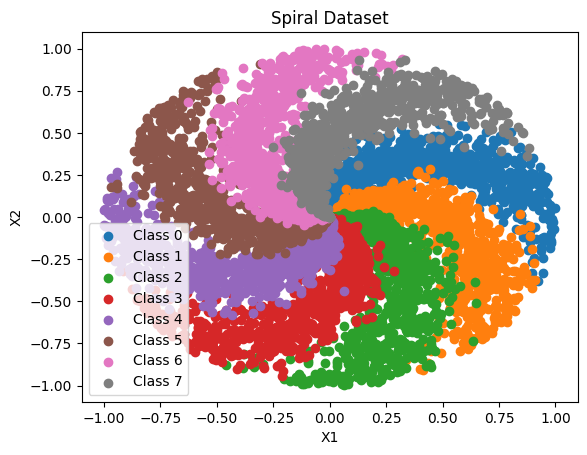

In [63]:
sd.plot_spiral(X_train, encoder.decode(y_train), num_classes=num_classes)

In [64]:
model.fit(X_train, y_train, 1000, .001, CE())
y_pred = encoder.decode(model.predict(X_test))
y_act = encoder.decode(y_test)

Epoch 0/1000, Loss: 1.1917
Epoch 99/1000, Loss: 1.0795
Epoch 199/1000, Loss: 1.0645
Epoch 299/1000, Loss: 1.0549
Epoch 399/1000, Loss: 1.0501
Epoch 499/1000, Loss: 1.0474
Epoch 599/1000, Loss: 1.0455
Epoch 699/1000, Loss: 1.0439
Epoch 799/1000, Loss: 1.0426
Epoch 899/1000, Loss: 1.0414
Epoch 999/1000, Loss: 1.0404


In [65]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_act = np.argmax(y_test, axis=1)
accuracy = sum(y_pred == y_act) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.805625


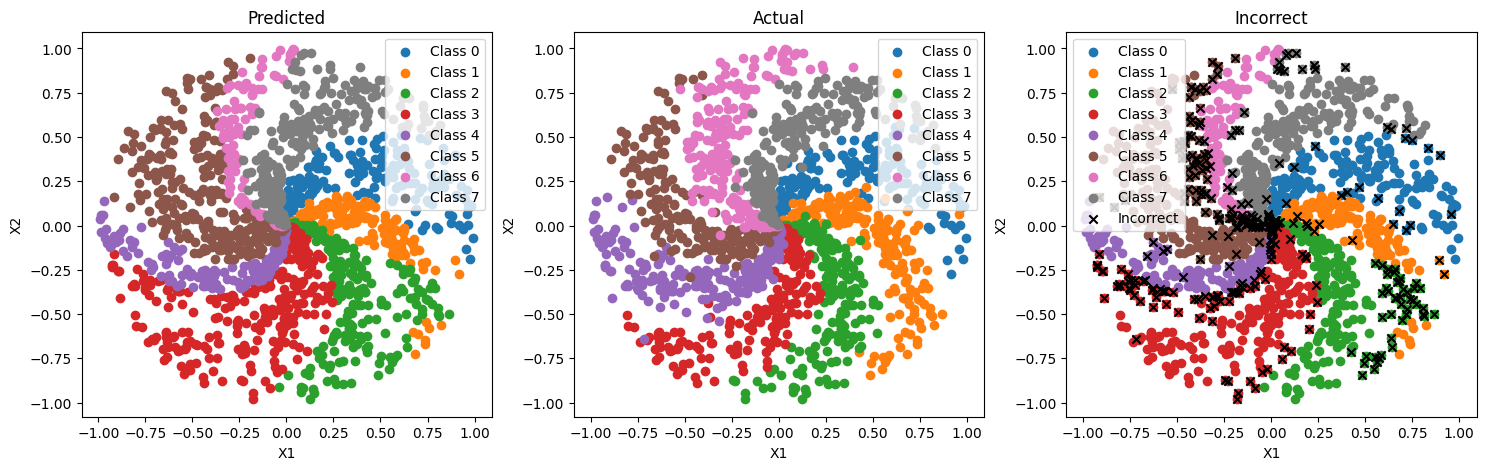

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax = ax.flatten()


sd.plot_spiral(X_test, y_pred, num_classes, title="Predicted", ax=ax[0], render=False)
sd.plot_spiral(X_test, y_act, num_classes, title="Actual", ax=ax[1], render=False)
sd.plot_spiral(X_test, y_pred, num_classes, title="Incorrect", correct=y_act, ax=ax[2], render=False)
plt.show()